In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data_path = "/home/kanli/Volume-Transformer-main/AMZN_2021-04-01_34200000_57600000_message_50.csv"
# data_path = "/Users/kang/Data/AMZN_2021-04-01_34200000_57600000_message_50.csv"
df = pd.read_csv(data_path)
message = df[df.iloc[:,1] == 4];message.columns = ['time','type','order_id','quantity','price','side','remark']
data_path = "/home/kanli/Volume-Transformer-main/AMZN_2021-04-01_34200000_57600000_orderbook_50.csv";df = pd.read_csv(data_path)
# data_path = "/Users/kang/Desktop/Volume-Tranformer/AMZN_2021-04-01_34200000_57600000_orderbook_50.csv";df = pd.read_csv(data_path)
df1 = df.iloc[:,[0,2]];df1.columns =['best_ask','best_bid'];df1
df2 = pd.merge(message, df1,left_index=True, right_index=True);df2 = df2.reset_index();df2 = df2.drop(['remark'],axis = 1);df2

/tmp/ipykernel_20891/2054220515.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,index,time,type,order_id,quantity,price,side,best_ask,best_bid
0,89,34201.238593,4,14152133,9,31179100,1,31180000,31177500
1,92,34201.238728,4,7096337,57,31177500,1,31180000,31175000
2,96,34201.252830,4,7970541,2,31175000,1,31180000,31175000
3,100,34201.292545,4,15695801,16,31176200,1,31180000,31175000
4,121,34201.302979,4,3032093,1,31180000,-1,31180000,31175000
...,...,...,...,...,...,...,...,...,...
22948,476968,57599.537055,4,405420365,71,31610400,1,31615200,31610300
22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100
22950,476979,57599.683115,4,405298481,64,31610100,1,31615500,31610100
22951,476990,57599.803359,4,405402061,100,31615500,-1,31616900,31610100


In [ ]:
# https://drive.google.com/file/d/1-RSH48sElHZbwqmNnypV9l_-OC_ZapI8/view?usp=sharing

In [3]:
small =  df2[df2.quantity<=10];small
small['d1']= small.quantity.diff();small
small['d2'] = small.d1.diff();small = small.dropna();small
small = small.reset_index();small
small_train = small.iloc[:14000,:];small_train
small_test = small.iloc[14000:,:];small_test

/tmp/ipykernel_20891/1035200384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['d1']= small.quantity.diff();small
/tmp/ipykernel_20891/1035200384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['d2'] = small.d1.diff();small = small.dropna();small


,level_0,index,time,type,order_id,quantity,price,side,best_ask,best_bid,d1,d2
14000,21351,457960,57192.554637,4,379476525,1,31617100,-1,31617200,31609800,-3.0,-2.0
14001,21352,457964,57192.556140,4,380676205,1,31617200,-1,31617500,31613400,0.0,3.0
14002,21353,457967,57192.558365,4,383956945,1,31617500,-1,31617800,31613400,0.0,0.0
14003,21354,457969,57192.559737,4,388676309,1,31617800,-1,31617800,31613400,0.0,0.0
14004,21356,458033,57195.204421,4,388676309,4,31617800,-1,31618500,31612100,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14904,22929,476828,57597.544589,4,405235357,3,31609900,1,31616900,31609900,0.0,-2.0
14905,22932,476849,57597.718451,4,405254957,2,31615200,-1,31616900,31610100,-1.0,-1.0
14906,22945,476965,57599.532084,4,405395101,3,31610400,1,31615200,31610400,1.0,2.0
14907,22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100,7.0,6.0


In [4]:
group = []
group_size = 5
for item in range(len(df2)//group_size):
    group += [item]*group_size

In [5]:
df2 = df2.iloc[:len(group),:];df2

,index,time,type,order_id,quantity,price,side,best_ask,best_bid
0,89,34201.238593,4,14152133,9,31179100,1,31180000,31177500
1,92,34201.238728,4,7096337,57,31177500,1,31180000,31175000
2,96,34201.252830,4,7970541,2,31175000,1,31180000,31175000
3,100,34201.292545,4,15695801,16,31176200,1,31180000,31175000
4,121,34201.302979,4,3032093,1,31180000,-1,31180000,31175000
...,...,...,...,...,...,...,...,...,...
22945,476965,57599.532084,4,405395101,3,31610400,1,31615200,31610400
22946,476966,57599.532084,4,405420365,97,31610400,1,31615200,31610400
22947,476967,57599.536811,4,405420365,100,31610400,1,31615200,31610400
22948,476968,57599.537055,4,405420365,71,31610400,1,31615200,31610300


In [6]:
df2['group_index'] = group;df2

/tmp/ipykernel_20891/21153901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['group_index'] = group;df2


,index,time,type,order_id,quantity,price,side,best_ask,best_bid,group_index
0,89,34201.238593,4,14152133,9,31179100,1,31180000,31177500,0
1,92,34201.238728,4,7096337,57,31177500,1,31180000,31175000,0
2,96,34201.252830,4,7970541,2,31175000,1,31180000,31175000,0
3,100,34201.292545,4,15695801,16,31176200,1,31180000,31175000,0
4,121,34201.302979,4,3032093,1,31180000,-1,31180000,31175000,0
...,...,...,...,...,...,...,...,...,...,...
22945,476965,57599.532084,4,405395101,3,31610400,1,31615200,31610400,4589
22946,476966,57599.532084,4,405420365,97,31610400,1,31615200,31610400,4589
22947,476967,57599.536811,4,405420365,100,31610400,1,31615200,31610400,4589
22948,476968,57599.537055,4,405420365,71,31610400,1,31615200,31610300,4589


In [7]:
groupped = df2.groupby('group_index')

In [8]:
quantity = groupped[['quantity']].sum();quantity = np.array(quantity.iloc[:,0].tolist());quantity

array([ 85,   9,  81, ..., 155, 297, 281])

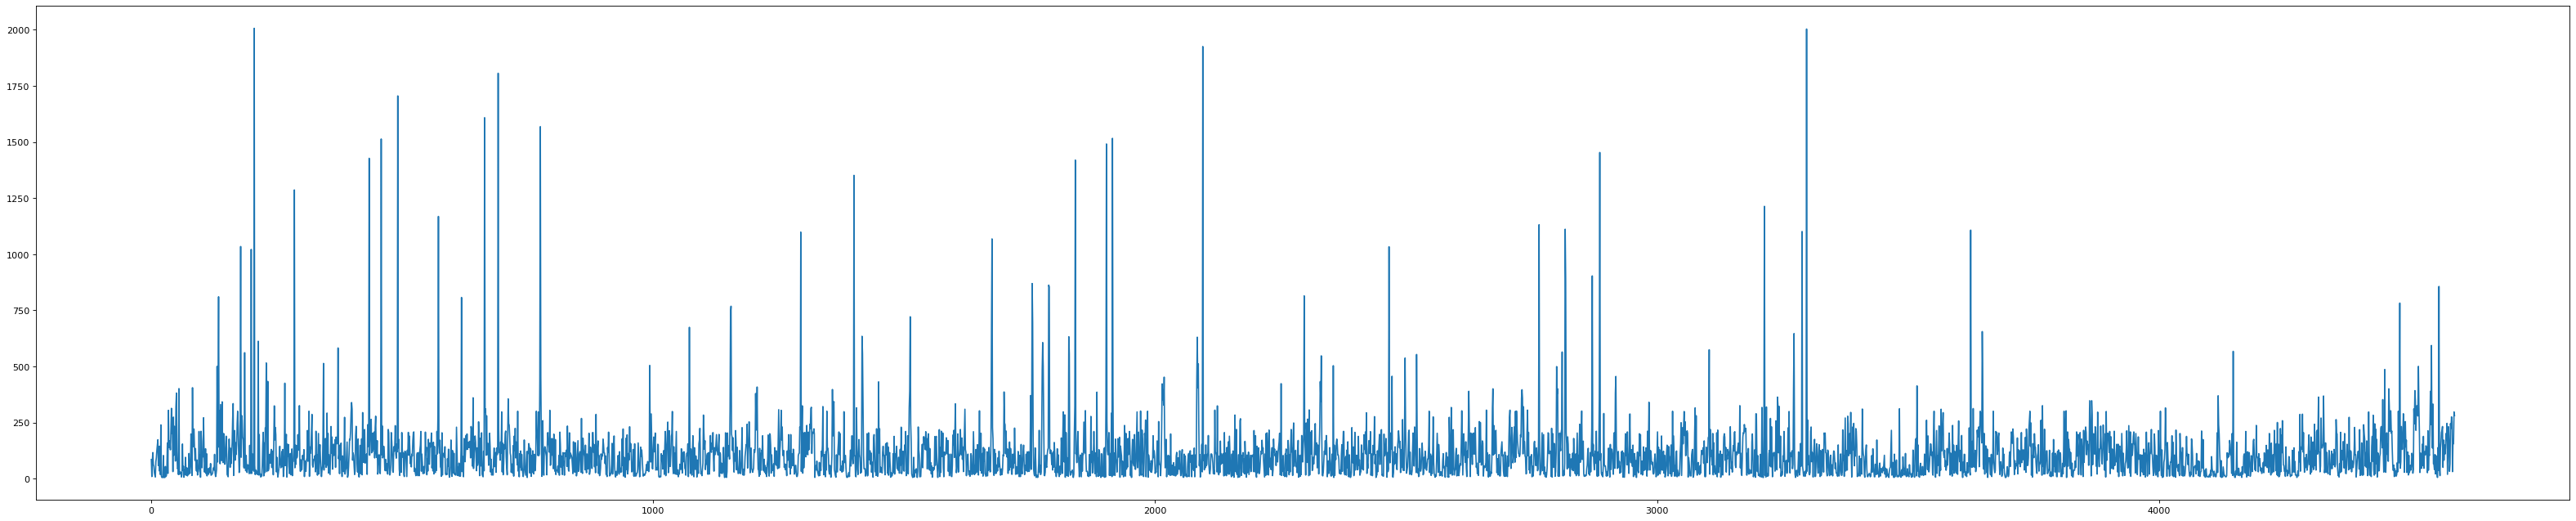

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
plt.plot(np.arange(len(quantity)), quantity)

In [10]:
quantity_train = quantity[:len(quantity)//5*4]
quantity_test  = quantity[len(quantity)//5*4:]

In [11]:
len(quantity_train),len(quantity),len(quantity_test)

(3672, 4590, 918)

In [12]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(quantity_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=47151.157, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=48794.477, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=47889.710, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=48205.594, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=47974.484, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=47681.910, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=47043.680, Time=1.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47056.013, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47046.616, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=47045.289, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=47045.220, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   :

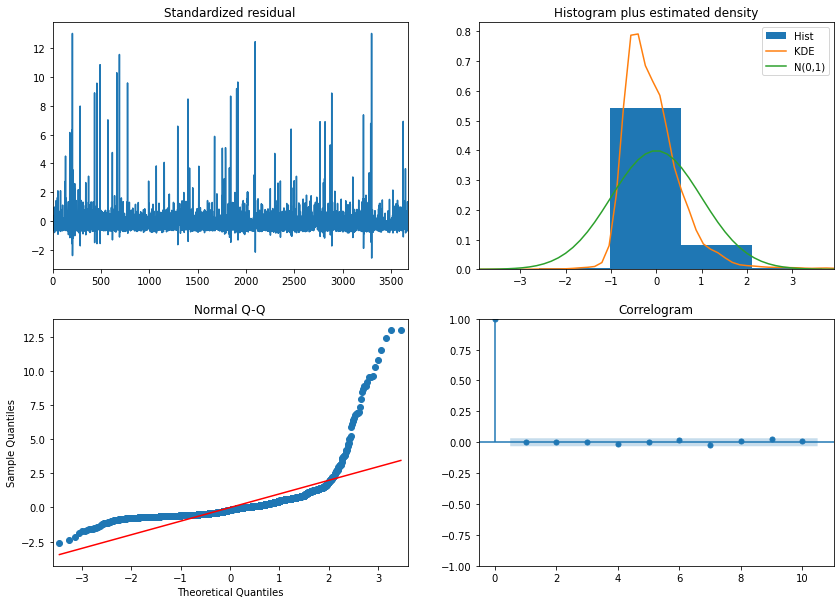

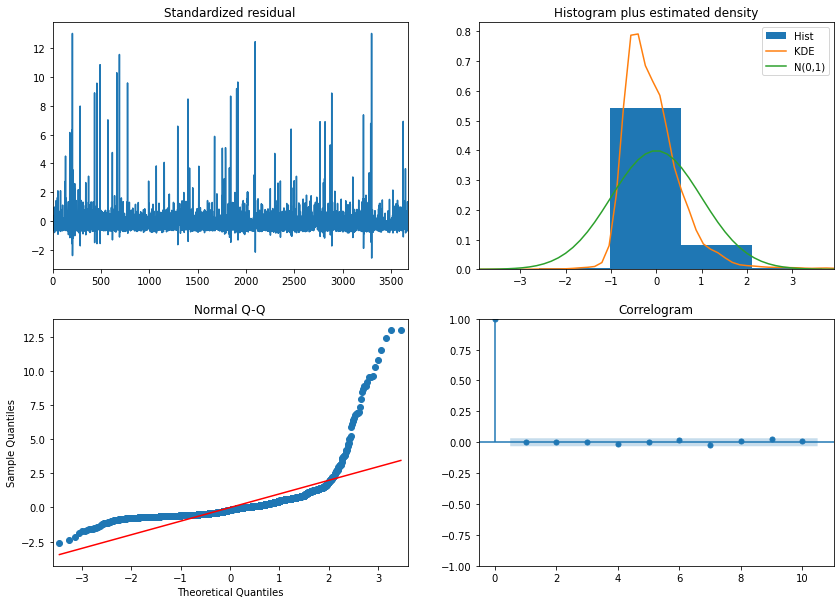

In [14]:
model.plot_diagnostics(figsize=(14,10))

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt 

/home/kanli/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


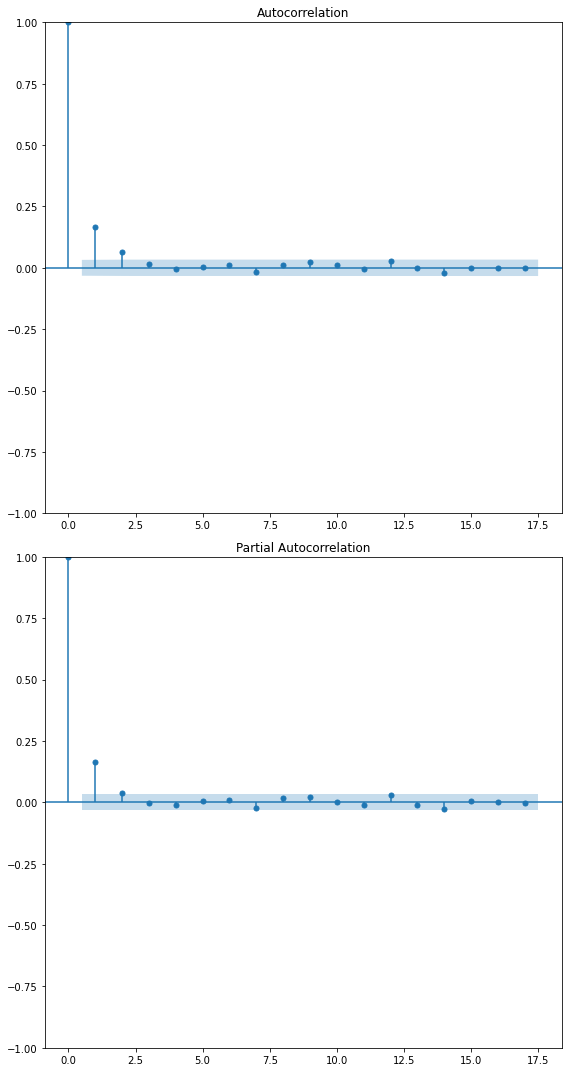

In [16]:
fig = plt.figure(figsize = (8, 15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(quantity_train, lags = 17 , ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(quantity_train, lags = 17 , ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

In [17]:
length = 900
predicted = pd.DataFrame(model.predict(n_periods=length))
y = quantity_test[:length]
SSres = sum(map(lambda x: (x[0]-x[1])**2, zip(y, predicted)));SSres
SStot = sum([(x-np.mean(y))**2 for x in y]);SStot
1-(SSres/SStot)

9.997187220919991e-01

In [65]:
from sklearn.metrics import r2_score
print('R-Square(metrics):', r2_score(y, predicted))

R-Square(metrics): -0.012964880037427129


R-Square(metrics): -1.2964880037427129e-02


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.93566D+00    |proj g|=  1.09841D+00

At iterate    5    f=  7.10134D+00    |proj g|=  4.57327D-01


 This problem is unconstrained.



At iterate   10    f=  6.96829D+00    |proj g|=  9.02446D-03

At iterate   15    f=  6.94996D+00    |proj g|=  5.30324D-03

At iterate   20    f=  6.88325D+00    |proj g|=  1.27246D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     44      1     0     0   1.270D-02   6.883D+00
  F =   6.8832527698115689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


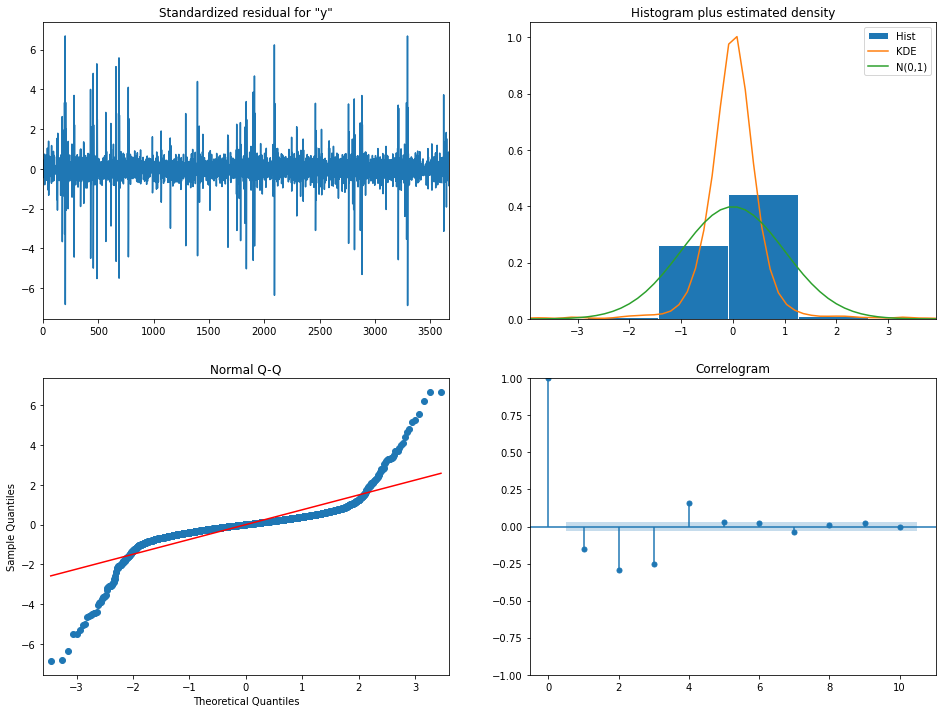

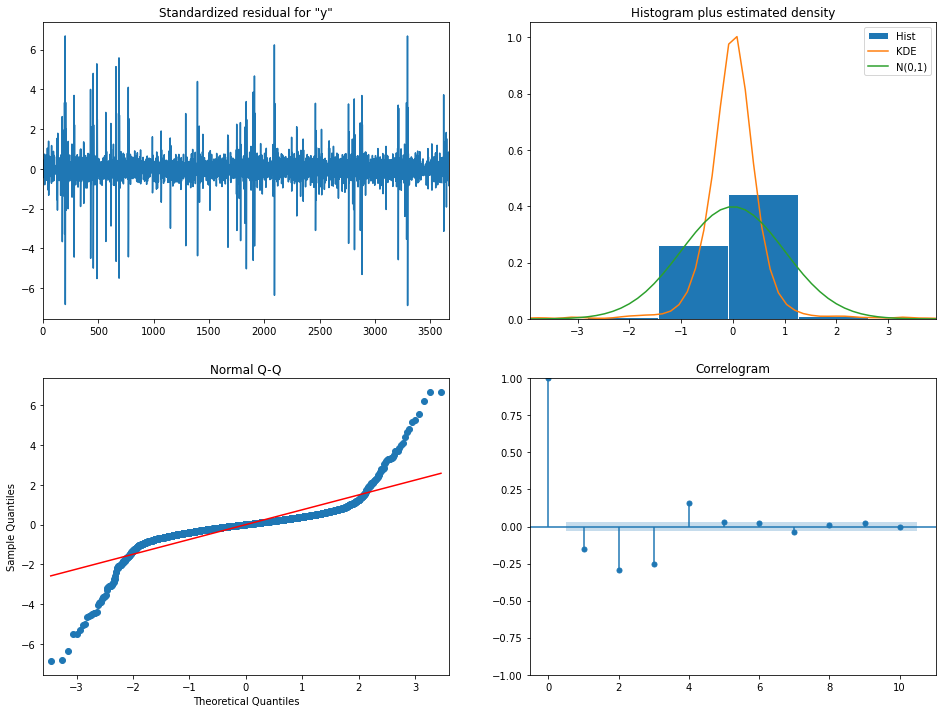

In [21]:
arima = sm.tsa.SARIMAX(quantity_train,order=(2,4,2))
model_results = arima.fit()
model_results.plot_diagnostics(figsize=(16,12))

In [96]:
# length = 1
# y = quantity_test[:length]
# y_pred = model_results.forecast(length)
# from sklearn.metrics import r2_score
# print('R-Square(metrics):', r2_score(y, y_pred))

R-Square(metrics): -4.2405147894719075


In [23]:
index = 1
y = quantity_test[index:index+1]
y_pred = model_results.forecast(1)
result  = (y, y_pred); print(result)

(array([26]), array([200.14273095]))
